In [1]:
import sys
sys.path.append("../../smsl")

In [2]:
from smsl.plotAgent import PlotAgent, palette
from smsl.plotAgent import font_label, font_xylabel, font_xyticks
from smsl.plotAgent import SinglePlotAgent

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [4]:
## declare subgroups
s2index_col = {
'bm' : [0,1,2],
'hb' : [0,1],
'st' : [0,1],
'rb' : 0,
'pr0': 0,
'pr1': 0,
}
subgroups = list(s2index_col.keys())
## load ks avg data in each position and each subgroup
s2df_ks_position = {}
for s, index_col in s2index_col.items():
    s2df_ks_position[s] = pd.read_csv(f'data/{s}_avg.csv', index_col=index_col)

In [5]:
def get_trend_line(x, y, xlim, is_filter=True):
    # Filtered data
    if is_filter:
        coefficients = np.polyfit(x, y, 1)
        polynomial = np.poly1d(coefficients)
        y_fit = polynomial(x)
        residuals = y - y_fit
        outlier_mask = np.abs(residuals) < 2 * np.std(residuals)
        x = x[outlier_mask]
        y = y[outlier_mask]
    ## Generate trend line
    xlim_min, xlim_max = xlim
    xlim_min = xlim_min + (xlim_max-xlim_min) * 0.1
    xlim_max = xlim_max - (xlim_max-xlim_min) * 0.1
    x_range = np.linspace(xlim_min, xlim_max, 5)
    coefficients = np.polyfit(x, y, 1)  # 1 indicates a linear fit
    polynomial = np.poly1d(coefficients)
    y_fit_from_x_range = polynomial(x_range)
    # Calculate R^2
    y_fit = polynomial(x)
    ss_total = np.sum((y - np.mean(y))**2)  # Total sum of squares
    ss_residual = np.sum((y - y_fit)**2)         # Residual sum of squares
    r_squared = 1 - (ss_residual / ss_total)          # R^2 calculation
    info = f'{coefficients[0]:.2f}x{coefficients[1]:+.2f}, $\\rm{{R}}^{{2}}$={r_squared:.2f}'
    return x_range, y_fit_from_x_range, info

### G4DNA

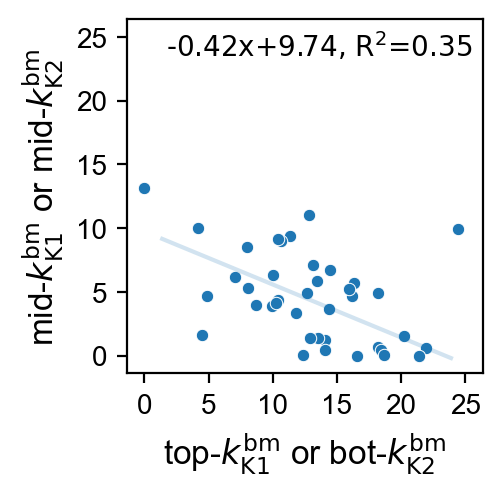

In [6]:
s1, s2 = 'bm', 'bm'
system_offical_names = ['Propeller', 'Basket', 'Chair', 'Hybrid-I', 'Hybrid-II']
df_loc = s2df_ks_position[s1].loc[system_offical_names]
ks1 = df_loc[df_loc.index.get_level_values(2)!='mid'].to_numpy().flatten() ## top-K1, bot-K2
ks2 = df_loc[df_loc.index.get_level_values(2)=='mid'].to_numpy().flatten() ## mid-K1, mid-K2

p_agent = SinglePlotAgent(figsize_1=[2.3, 2.3])
sns.scatterplot(x=ks1, y=ks2, ax=p_agent.axs, s=20)
p_agent.set_xticks(range(0, 30, 5), x_padding=True)
p_agent.set_yticks(range(0, 30, 5), y_padding=True)
p_agent.set_xlabel(r'top-$k^{\rm{bm}}_{\rm{K1}}$ or bot-$k^{\rm{bm}}_{\rm{K2}}$')
p_agent.set_ylabel(r'mid-$k^{\rm{bm}}_{\rm{K1}}$ or mid-$k^{\rm{bm}}_{\rm{K2}}$')
x_line, y_line, info = get_trend_line(ks1, ks2, p_agent.axs.get_xlim())
p_agent.fig.text(x=0.21, y=0.8, s=info)
p_agent.axs.plot(x_line, y_line, alpha=0.2)
p_agent.savefig('g4dna_bm_bm_corr.svg')

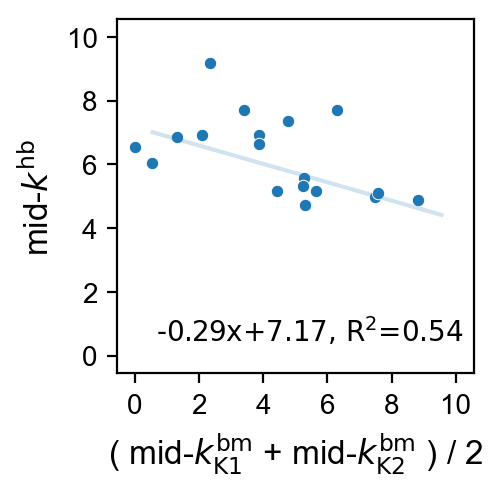

In [7]:
s1, s2 = 'bm', 'hb'
system_offical_names = ['Propeller', 'Basket', 'Chair', 'Hybrid-I', 'Hybrid-II']
df_loc = s2df_ks_position[s1].loc[system_offical_names]
df_mid_k1 = df_loc[(df_loc.index.get_level_values(1)=='K1')&(df_loc.index.get_level_values(2)=='mid')]
df_mid_k2 = df_loc[(df_loc.index.get_level_values(1)=='K2')&(df_loc.index.get_level_values(2)=='mid')]
ks1 = ((df_mid_k1.to_numpy() + df_mid_k2.to_numpy())/2).flatten()
df_loc = s2df_ks_position[s2].loc[system_offical_names]
ks2 = df_loc[df_loc.index.get_level_values(1)=='mid'].to_numpy().flatten()

p_agent = SinglePlotAgent(figsize_1=[2.3, 2.3])
sns.scatterplot(x=ks1, y=ks2, ax=p_agent.axs, s=20)
p_agent.set_xticks(range(0, 11, 2), x_padding=True)
p_agent.set_yticks(range(0, 11, 2), y_padding=True)
p_agent.set_xlabel(r'( mid-$k^{\rm{bm}}_{\rm{K1}}$ + mid-$k^{\rm{bm}}_{\rm{K2}}$ ) / 2')
p_agent.set_ylabel(r'mid-$k^{\rm{hb}}$')
x_line, y_line, info = get_trend_line(ks1, ks2, p_agent.axs.get_xlim())
p_agent.fig.text(x=0.21, y=0.18, s=info)
p_agent.axs.plot(x_line, y_line, alpha=0.2)
p_agent.savefig('g4dna_bm_hb_corr.svg')

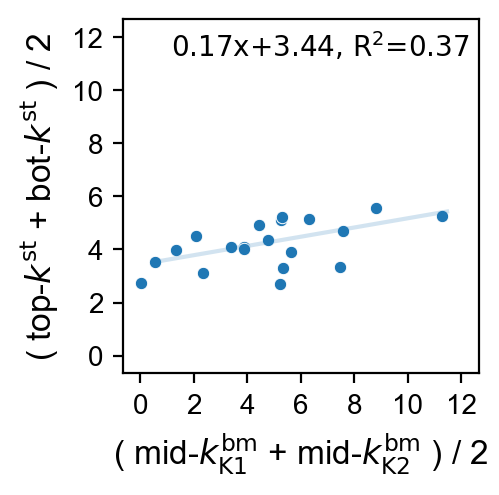

In [8]:
s1, s2 = 'bm', 'st'
system_offical_names = ['Propeller', 'Basket', 'Chair', 'Hybrid-I', 'Hybrid-II']
df_loc = s2df_ks_position[s1].loc[system_offical_names]
df_mid_k1 = df_loc[(df_loc.index.get_level_values(1)=='K1')&(df_loc.index.get_level_values(2)=='mid')]
df_mid_k2 = df_loc[(df_loc.index.get_level_values(1)=='K2')&(df_loc.index.get_level_values(2)=='mid')]
ks1 = ((df_mid_k1.to_numpy() + df_mid_k2.to_numpy())/2).flatten()
df_loc = s2df_ks_position[s2].loc[system_offical_names]
df_top = df_loc[df_loc.index.get_level_values(1)=='top']
df_bot = df_loc[df_loc.index.get_level_values(1)=='bot']
ks2 = ((df_top.to_numpy() + df_bot.to_numpy())/2).flatten()

p_agent = SinglePlotAgent(figsize_1=[2.3, 2.3])
sns.scatterplot(x=ks1, y=ks2, ax=p_agent.axs, s=20)
p_agent.set_xticks(range(0, 13, 2), x_padding=True)
p_agent.set_yticks(range(0, 13, 2), y_padding=True)
p_agent.set_xlabel(r'( mid-$k^{\rm{bm}}_{\rm{K1}}$ + mid-$k^{\rm{bm}}_{\rm{K2}}$ ) / 2')
p_agent.set_ylabel(r'( top-$k^{\rm{st}}$ + bot-$k^{\rm{st}}$ ) / 2')
x_line, y_line, info = get_trend_line(ks1, ks2, p_agent.axs.get_xlim())
p_agent.fig.text(x=0.23, y=0.8, s=info)
p_agent.axs.plot(x_line, y_line, alpha=0.2)
p_agent.savefig('g4dna_bm_st_corr.svg')

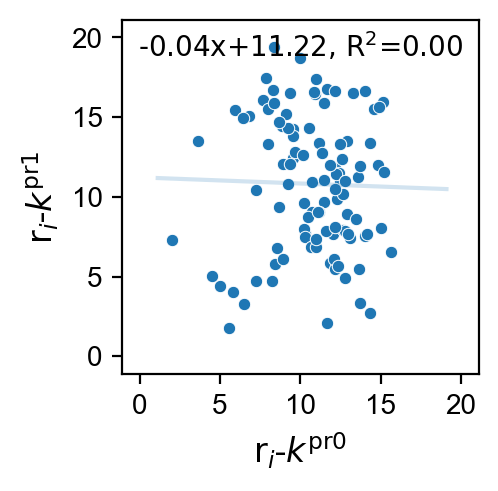

In [9]:
s1, s2 = 'pr0', 'pr1'
system_offical_names = ['Propeller', 'Basket', 'Chair', 'Hybrid-I', 'Hybrid-II']
ks1 = s2df_ks_position[s1][system_offical_names][:-1].to_numpy().flatten()
ks2 = s2df_ks_position[s2][system_offical_names][:].to_numpy().flatten()

p_agent = SinglePlotAgent(figsize_1=[2.3, 2.3])
sns.scatterplot(x=ks1, y=ks2, ax=p_agent.axs, s=20)
p_agent.set_xticks(range(0, 21, 5), x_padding=True)
p_agent.set_yticks(range(0, 21, 5), y_padding=True)
p_agent.set_xlabel(r'${\rm{r}}_{i}$-$k^{\rm{pr0}}$')
p_agent.set_ylabel(r'${\rm{r}}_{i}$-$k^{\rm{pr1}}$')
x_line, y_line, info = get_trend_line(ks1, ks2, p_agent.axs.get_xlim())
p_agent.fig.text(x=0.16, y=0.8, s=info)
p_agent.axs.plot(x_line, y_line, alpha=0.2)
p_agent.savefig('g4dna_pr0_pr1_corr.svg')

### DsDNA

In [10]:
s2df_ks_position = pd.read_csv(f'data/dsdna_avg.csv', index_col=0)

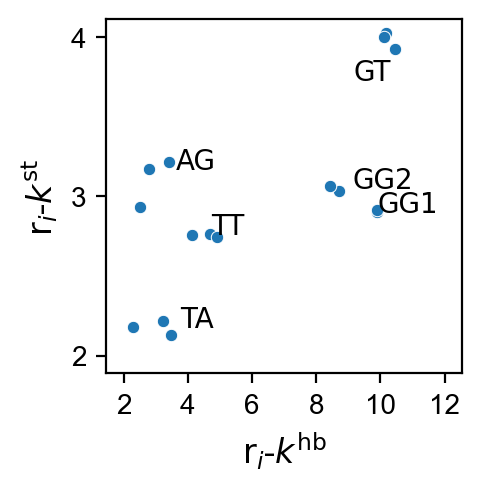

In [11]:
s1, s2 = 'hb', 'st'
df_s1 = s2df_ks_position[s1][3:-3]
df_s2 = s2df_ks_position[s2][3:-3]
p_agent = SinglePlotAgent(figsize_1=[2.3, 2.3])
sns.scatterplot(x=df_s1, y=df_s2, ax=p_agent.axs, s=20)
p_agent.set_xlabel(r'${\rm{r}}_{i}$-$k^{\rm{hb}}$')
p_agent.set_ylabel(r'${\rm{r}}_{i}$-$k^{\rm{st}}$')
p_agent.set_xticks(range(2, 13, 2), x_padding=True)
p_agent.set_yticks(range(2, 5, 1), y_padding=True)
plt.text( 9.16, 3.73, 'GT')
plt.text( 4.71, 2.76, 'TT')
plt.text( 3.75, 2.18, 'TA')
plt.text( 3.61, 3.17, 'AG')
plt.text( 9.92, 2.9 , 'GG1')
plt.text( 9.12, 3.05, 'GG2')
## label 'ri' in every point
# for k_m1, k_m2, ri in zip(df_s1, df_s2, df_s1.keys()):
#     plt.text(k_m1, k_m2, ri, size=5)
p_agent.savefig('dsdna_hb_st_corr.svg')

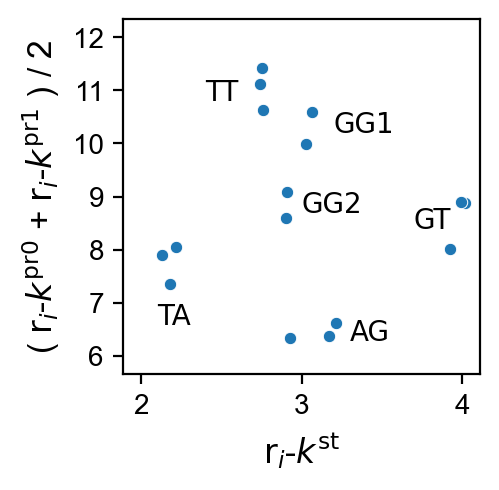

In [12]:
s1, s2 = 'st', ['pr0','pr1']
df_s1 = s2df_ks_position[s1][3:-3]
df_pr0 = s2df_ks_position[s2[0]][3:-3]
df_pr1 = s2df_ks_position[s2[1]][3:-3]
df_s2 = (df_pr0+df_pr1)/2

p_agent = SinglePlotAgent(figsize_1=[2.3, 2.3])
sns.scatterplot(x=df_s1, y=df_s2, ax=p_agent.axs, s=20)
p_agent.set_xlabel(r'${\rm{r}}_{i}$-$k^{\rm{st}}$')
p_agent.set_ylabel(r'( ${\rm{r}}_{i}$-$k^{\rm{pr0}}$ + ${\rm{r}}_{i}$-$k^{\rm{pr1}}$ ) / 2')
p_agent.set_xticks(range(2, 5, 1), x_padding=True)
p_agent.set_yticks(range(6, 13, 1), y_padding=True)
plt.text( 3.7, 8.4, 'GT')
plt.text( 2.4,10.8, 'TT')
plt.text( 2.1, 6.6, 'TA')
plt.text( 3.3, 6.3, 'AG')
plt.text( 3.2,10.2, 'GG1')
plt.text( 3.0, 8.7, 'GG2')
## label 'ri' in every point
# for k_m1, k_m2, ri in zip(df_s1, df_s2, df_s1.keys()):
#     plt.text(k_m1, k_m2, ri, size=5)
p_agent.savefig('dsdna_st_pr_corr.svg')